# Exploratory Data Analysis – Students Performance

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("Students_Academic_Performance_Dataset/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.info()
df[["math score", "reading score", "writing score"]].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Deskripsi Data
Dataset berisi informasi demografis dan nilai ujian siswa pada tiga mata pelajaran: matematika, membaca, dan menulis.

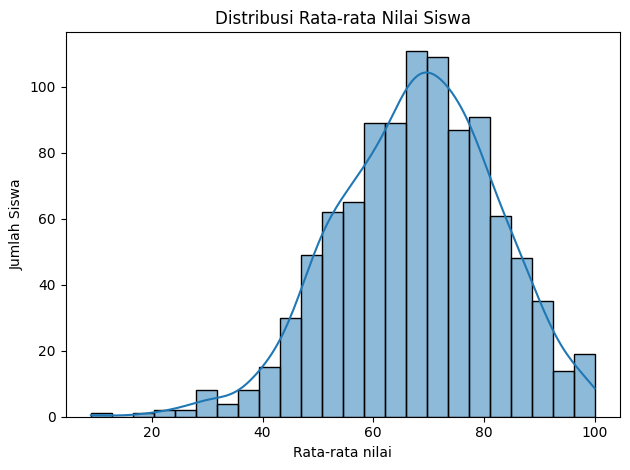

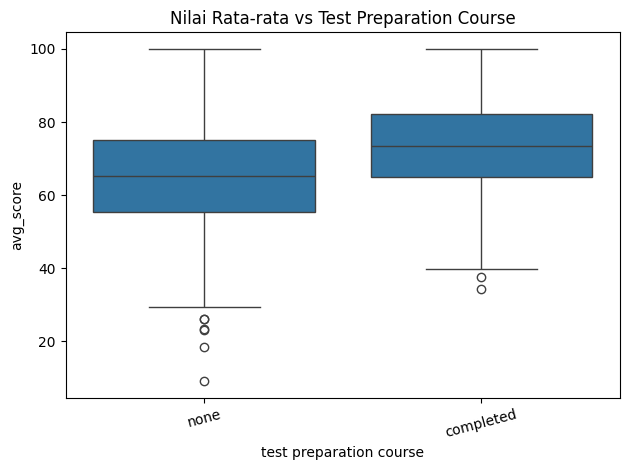

In [13]:
df["avg_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

plt.figure()
sns.histplot(df["avg_score"], kde=True)
plt.title("Distribusi Rata-rata Nilai Siswa")
plt.xlabel("Rata-rata nilai")
plt.ylabel("Jumlah Siswa")
plt.tight_layout()
plt.show()

plt.figure()
sns.boxplot(data=df, x="test preparation course", y="avg_score")
plt.title("Nilai Rata-rata vs Test Preparation Course")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


=== Classification Report (Background Only) ===
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       110
           1       0.63      0.63      0.63        90

    accuracy                           0.67       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.67      0.67      0.67       200



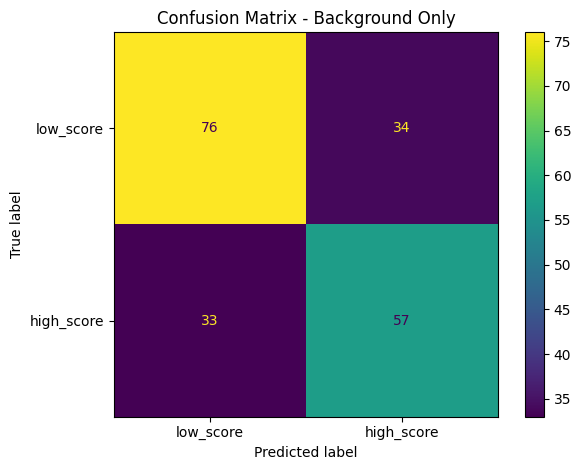

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

# Label: 1 = avg_score >= 70
df["high_score"] = (df["avg_score"] >= 70).astype(int)

cat_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course",
]

X = df[cat_cols]
y = df["high_score"]

# One-hot encoding
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("=== Classification Report (Background Only) ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
ConfusionMatrixDisplay(cm, display_labels=["low_score", "high_score"]).plot()
plt.title("Confusion Matrix - Background Only")
plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Baca data
df = pd.read_csv("Students_Academic_Performance_Dataset/StudentsPerformance.csv")
df["avg_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)
df["high_score"] = (df["avg_score"] >= 70).astype(int)

cat_cols = [
    "gender",
    "race/ethnicity",
    "parental level of education",
    "lunch",
    "test preparation course",
]

X = df[cat_cols]
y = df["high_score"]

# 2. One-hot encoding
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Definisikan beberapa model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
}

# 5. Latih & evaluasi semua model
for name, clf in models.items():
    print(f"\n=== {name} ===")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Akurasi: {acc:.3f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))



=== Logistic Regression ===
Akurasi: 0.665
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69       110
           1       0.63      0.63      0.63        90

    accuracy                           0.67       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.67      0.67      0.67       200


=== Random Forest ===
Akurasi: 0.590
Classification report:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       110
           1       0.55      0.52      0.53        90

    accuracy                           0.59       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.59      0.59      0.59       200


=== KNN (k=5) ===
Akurasi: 0.580
Classification report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       110
           1       0.53      0.53      0.53        9